

Gabriel Almeida Pimentel - 202010403



In [1]:
# Passo 1: Instalar o Pytesseract e o tesseract-OCR no Colab:
! sudo apt install tesseract-ocr 
! pip install pytesseract
! sudo apt-get install tesseract-ocr-por

# Importar bibliotecas:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import scipy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-por is already the newest version (4.00~git24-0e00fe6-1.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


1) Desenvolva um código que lhe permita abrir uma imagem RGB ou BGR de sua preferência, utilizando a interface python do OpenCV. Logo depois, converta a imagem para escala de cinza e exiba as duas imagens lado a lado na tela. Documente as funções utilizadas no código.



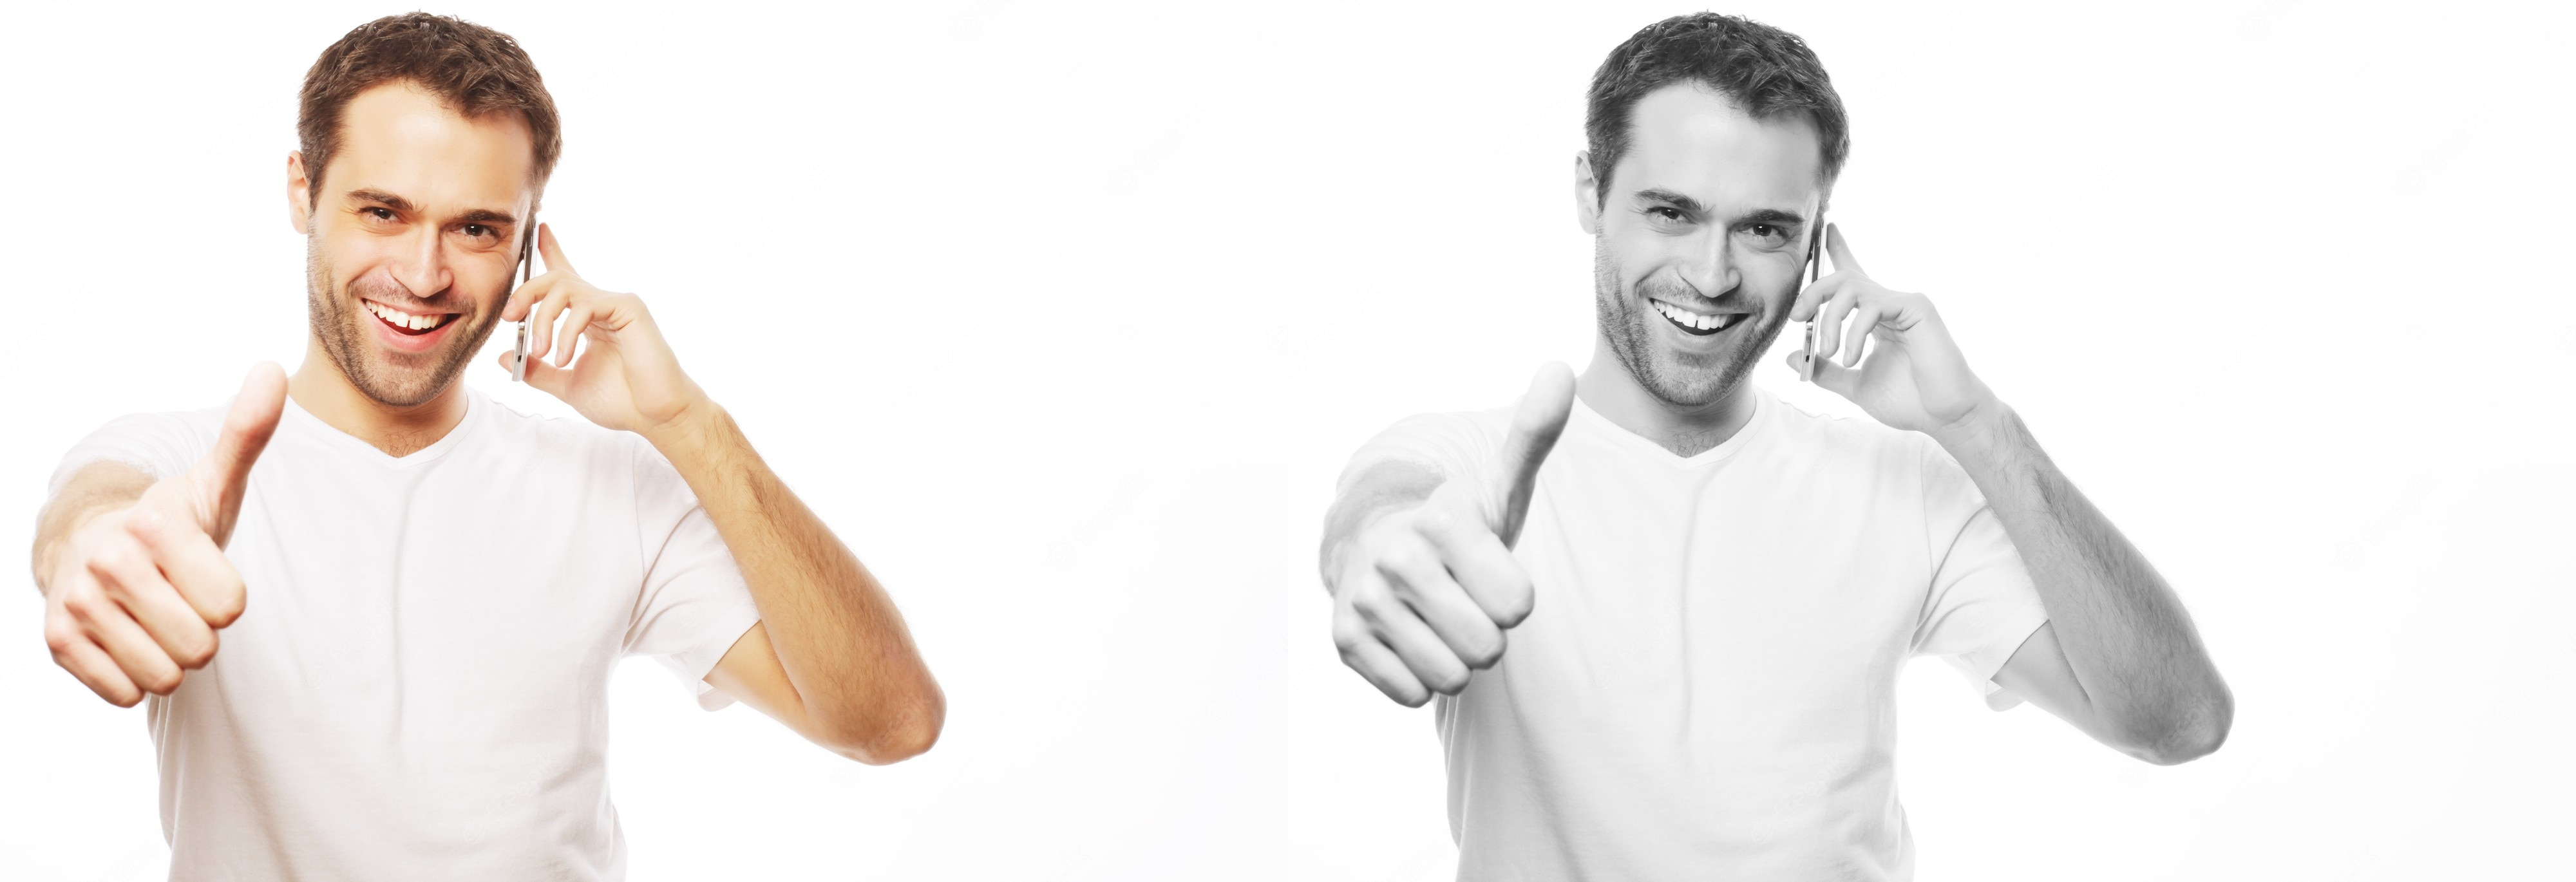

In [2]:
urls = ["image.jpg"]

for url in urls:
  image = cv.imread(url) 
  gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  graySpace = cv.cvtColor(gray,cv.COLOR_GRAY2BGR)

  final_frame = np.hstack((image, graySpace))

  cv2_imshow(final_frame)

2) Utilizando o código fonte das nossas aulas como base, carregue uma imagem contendo pelo menos uma face (pode ser a imagem carregada no item 1), depois carregue o modelo de detecção de faces utilizado nas nossas aulas anteriores. Construa um código de detecção de faces, encontre a caixa envolvente da face na imagem. Pinte o retângulo ao redor da(s) face(s) encontrada(s) e exiba a imagem pintada na tela. Documente as funções utilizadas no código.

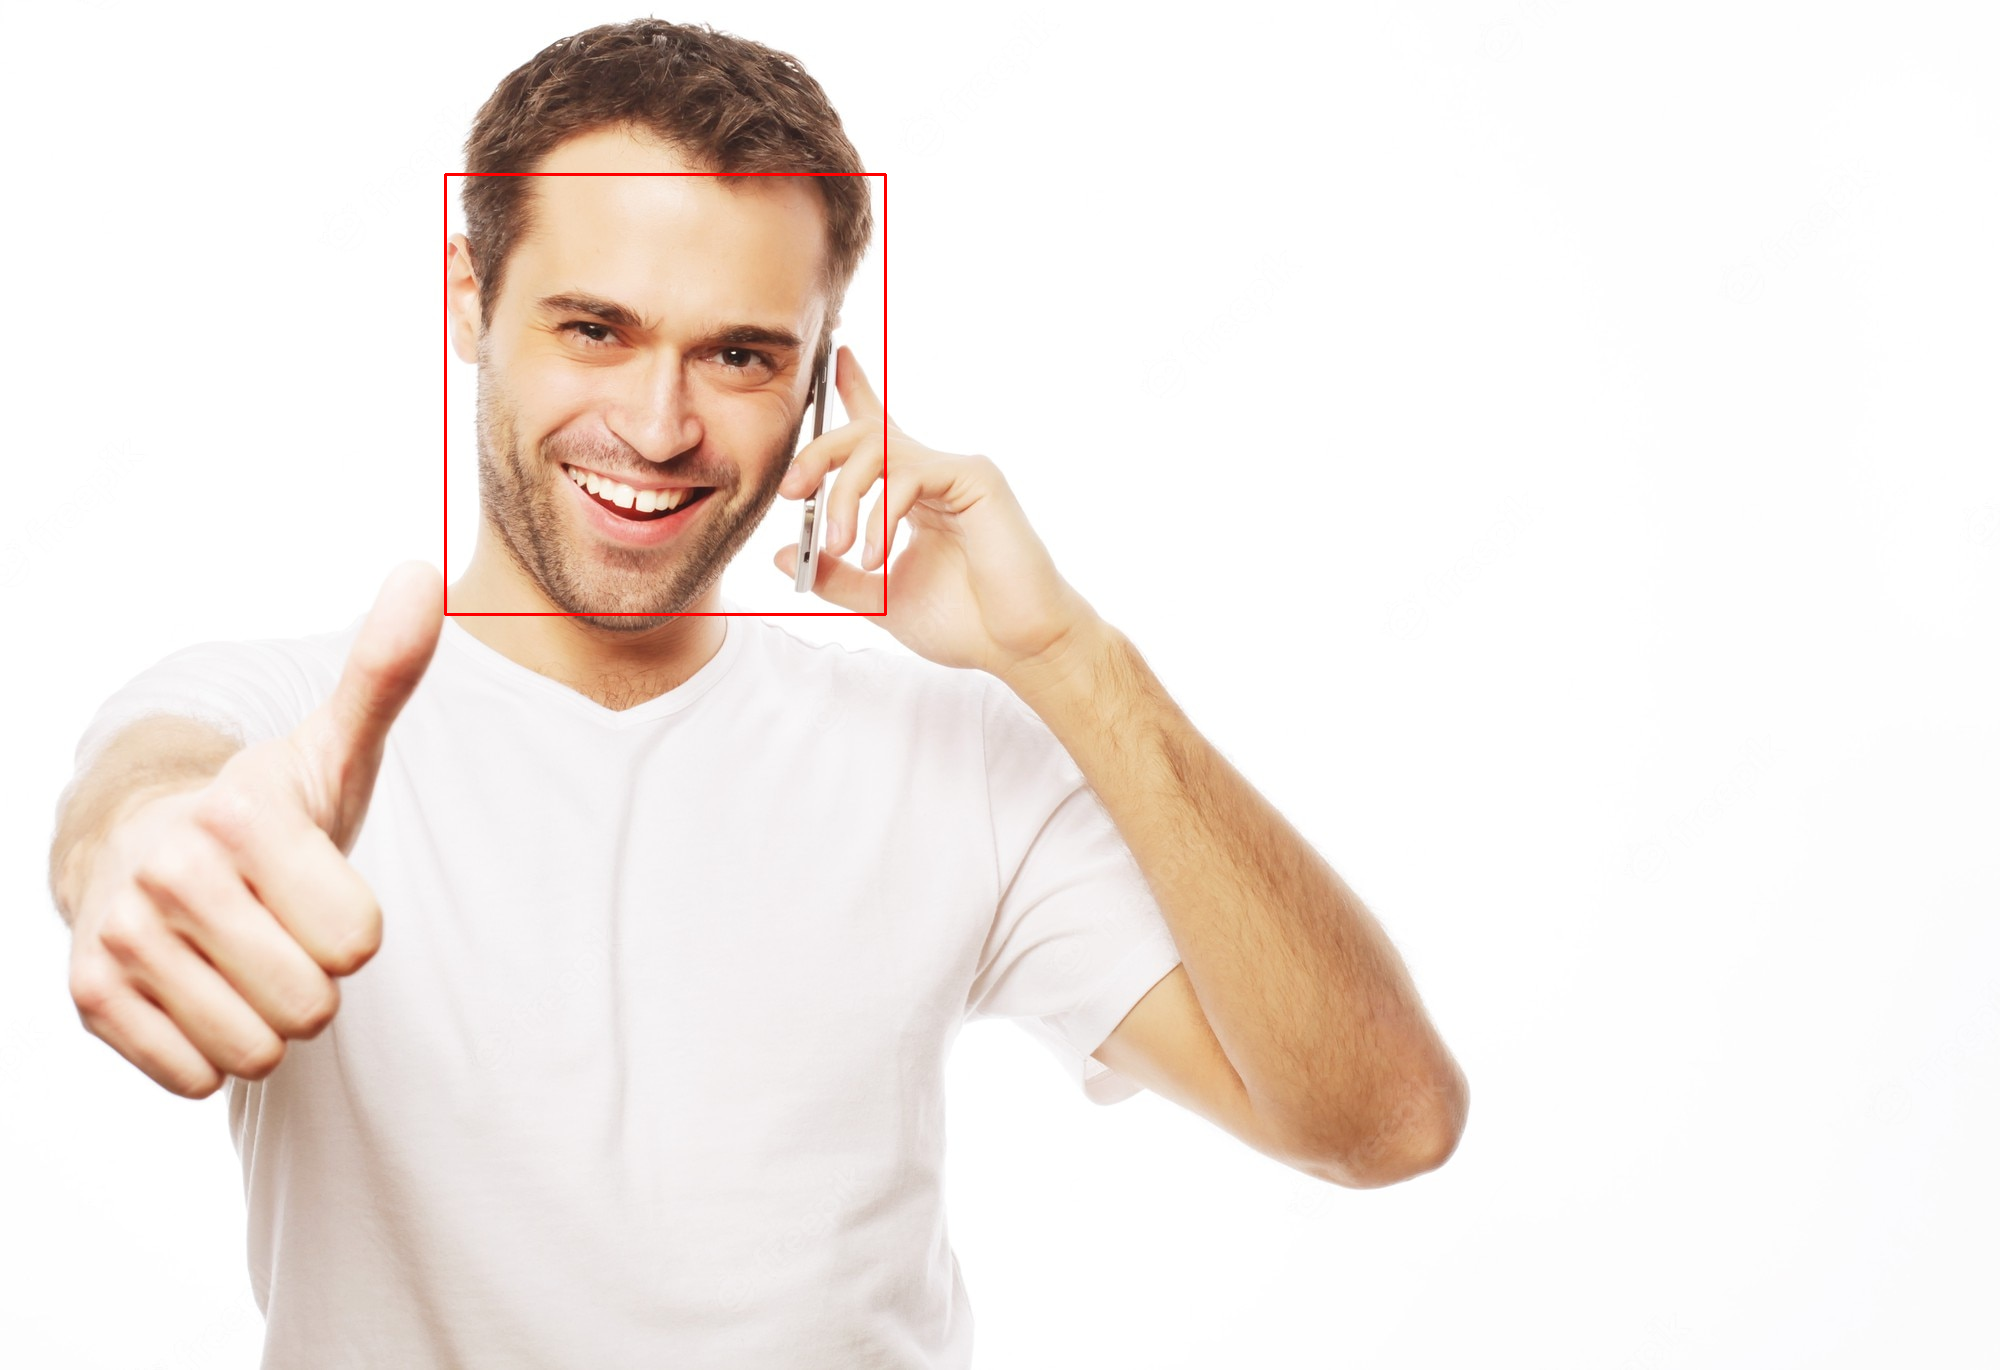

In [3]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')


faces = face_cascade.detectMultiScale(image,scaleFactor = 1.05, minNeighbors = 7, minSize = (30,30), flags = cv.CASCADE_SCALE_IMAGE)


for (x,y,w,h) in faces:
     cv.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)

cv2_imshow(image)

3) Carregue uma imagem que contenha uma página de texto de um documento digitalizado de sua preferência. Uma vez carregada a imagem, utilize o OCR com o qual trabalhamos na nossa última aula (Tesseract), reconheça o texto, e imprima o texto reconhecido na tela. Documente as funções utilizadas no código.



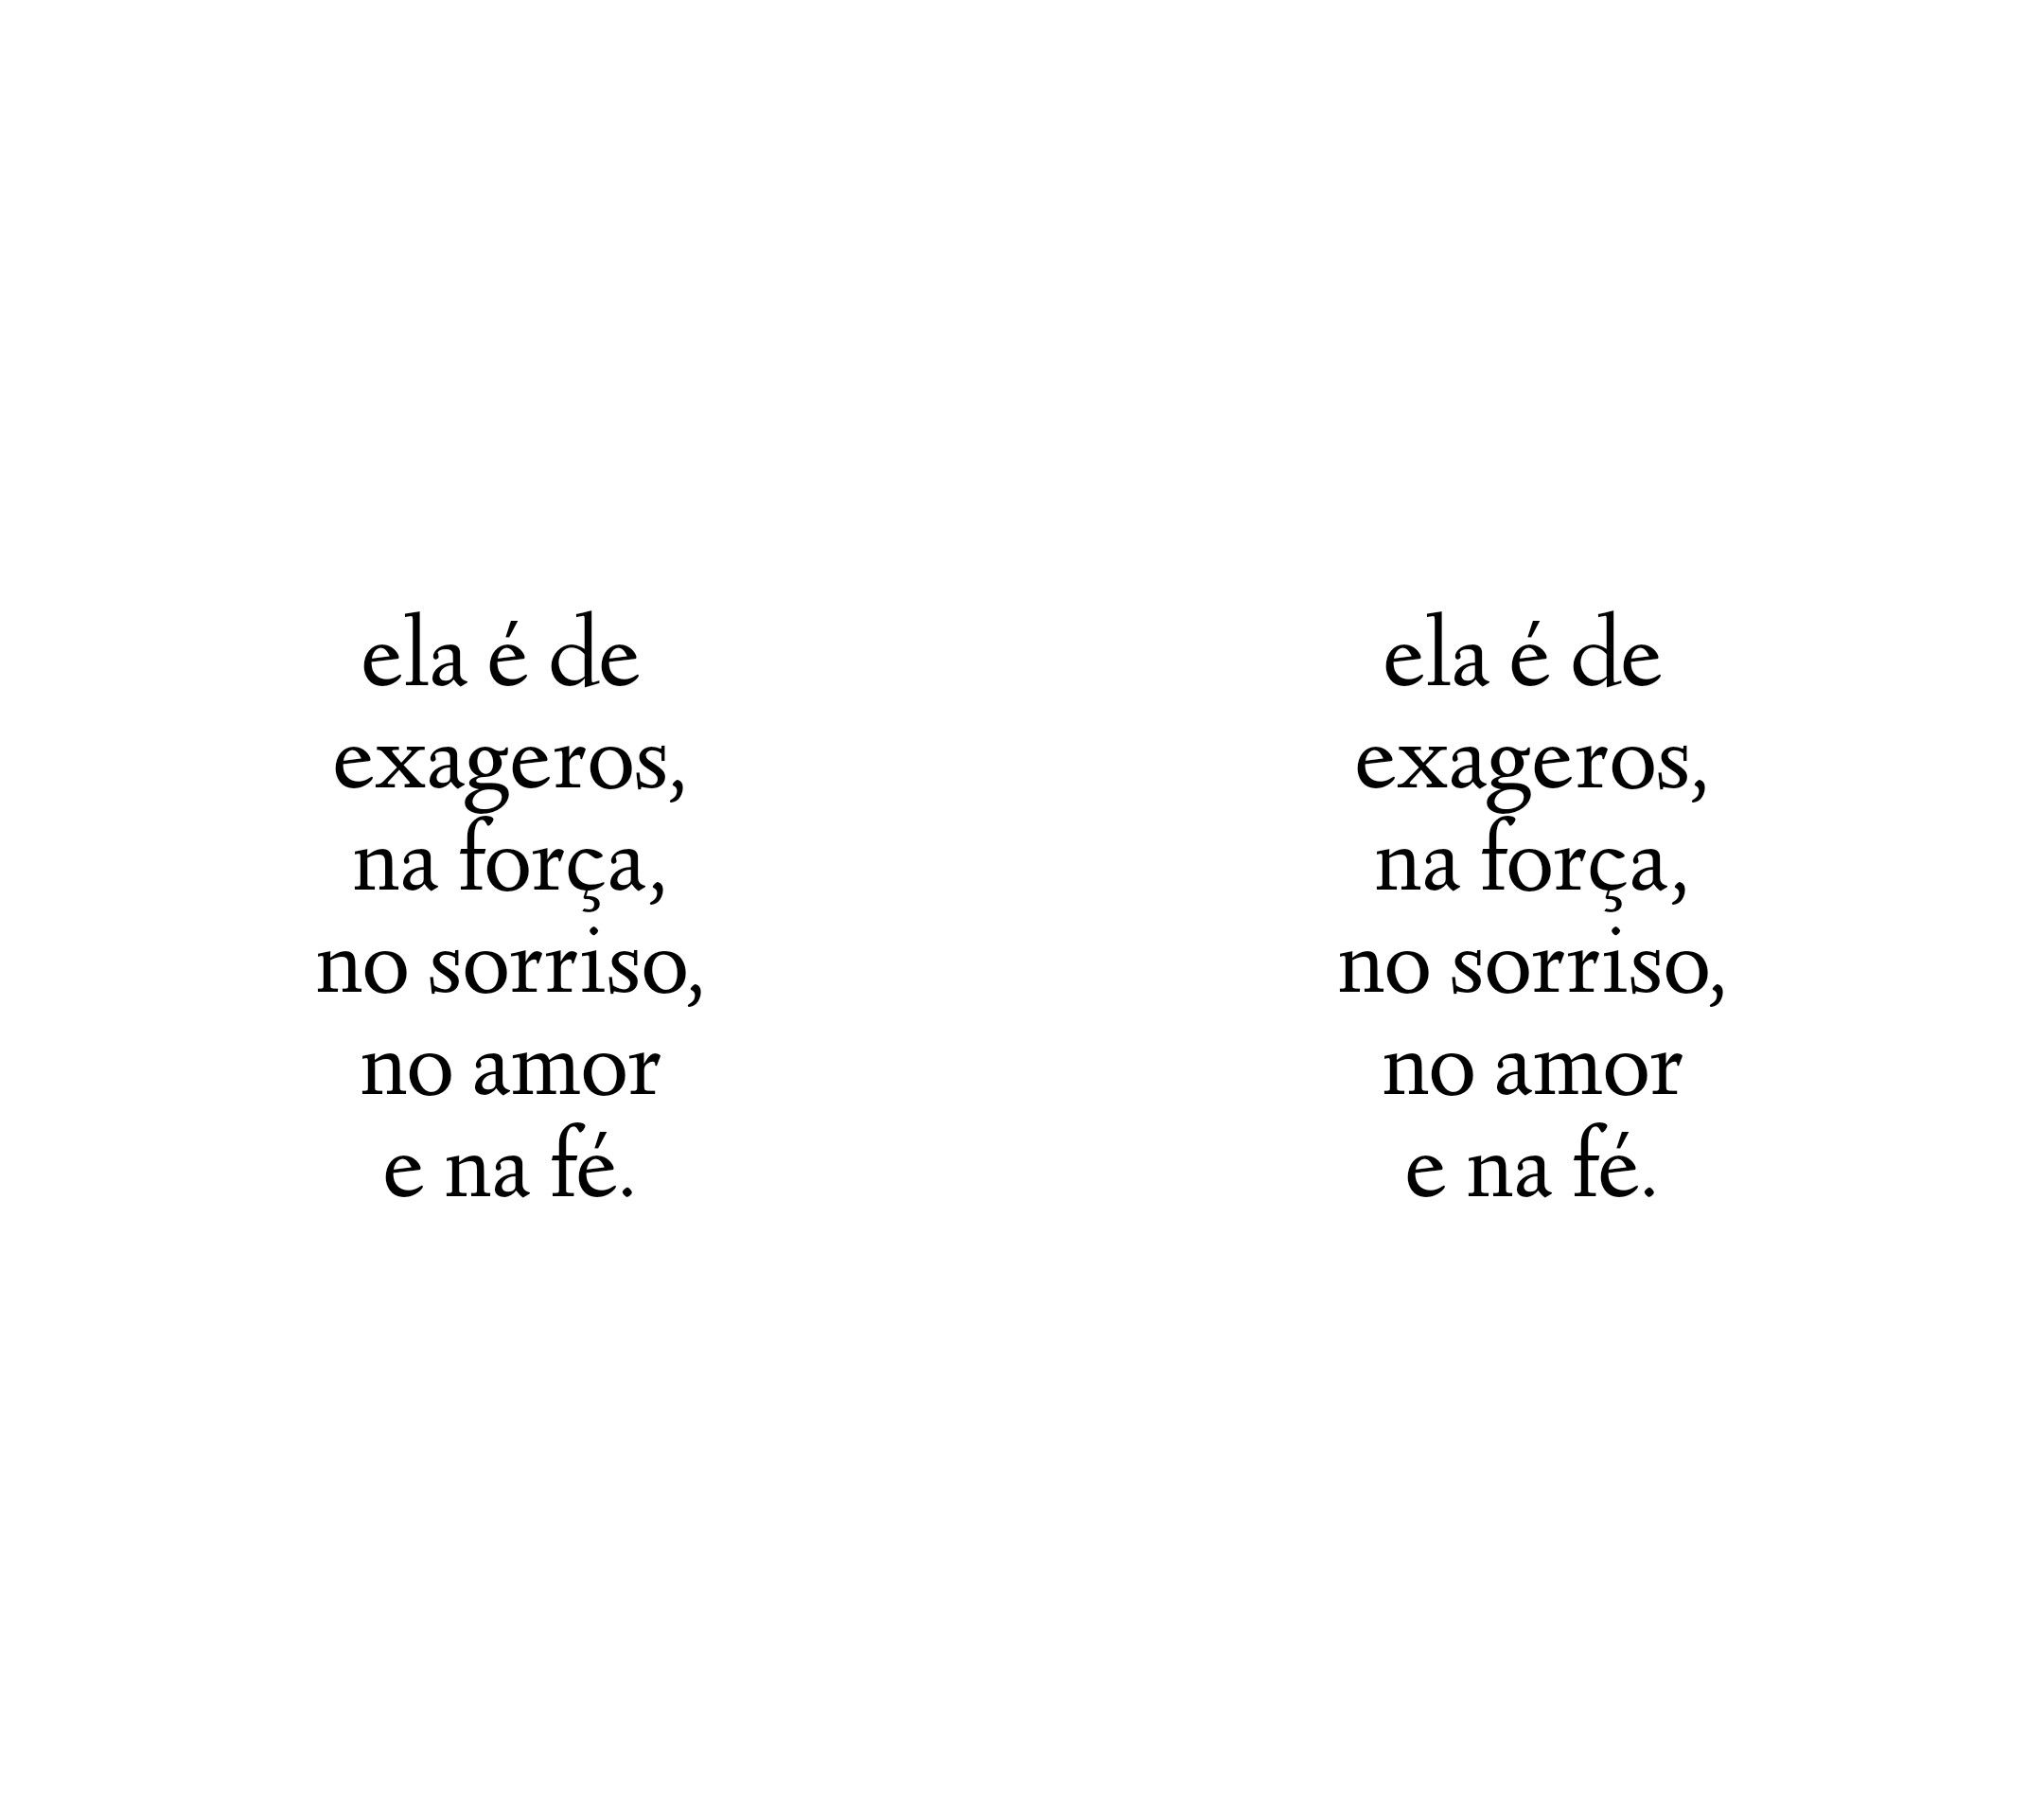

ela é de
exageros,
na força,
no SOrTrISO,
no amor
e na fé.



In [4]:
urls2 = ["img.jpg"]


for url in urls2:
  image = io.imread(url) 
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

  final_frame = cv.hconcat((image, image_2)) 
  cv2_imshow(final_frame)

extractedInformation = pytesseract.image_to_string(image, lang='por')
print(extractedInformation)